In [1]:
#checking nul values
import pandas as pd
csv_file = pd.read_csv('/content/Copy of online_payments_fraud_detection_dataset.csv')
csv_file=csv_file.dropna(axis = 0, subset = ['oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud'])
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [2]:
#Assigning value to categorical data
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
csv_file['type'] = csv_file['type'].map({'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'CASH_IN': 4})
csv_file['nameOrig_enc'] = enc.fit_transform(csv_file['nameOrig'])
csv_file['nameDest_enc'] = enc.fit_transform(csv_file['nameDest'])
csv_file

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_enc,nameDest_enc
0,1,0,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,757869,1662094
1,1,0,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,2188998,1733924
2,1,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1002156,439685
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,5828262,391696
4,1,0,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,3445981,828919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,5651847,505863
6362616,743,1,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1737278,260949
6362617,743,2,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,533958,108224
6362618,743,1,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,2252932,319713


In [3]:
#correlation
import seaborn as sns
import matplotlib.pyplot as plt
csv_file = csv_file.drop(['nameOrig','nameDest'],axis=1)
corr = csv_file.corr()
corr

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_enc,nameDest_enc
step,1.000000,-0.001992,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,-0.000146,0.003767
type,-0.001992,1.000000,0.050693,0.415700,0.431006,0.165383,0.135362,-0.004463,-0.000730,-0.000032,-0.693603
amount,0.022373,0.050693,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,0.000124,-0.169150
oldbalanceOrg,-0.010058,0.415700,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.000648,-0.162688
newbalanceOrig,-0.010299,0.431006,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.000675,-0.166489
oldbalanceDest,0.027665,0.165383,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.000245,-0.198119
newbalanceDest,0.025888,0.135362,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.000255,-0.203992
isFraud,0.031578,-0.004463,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,-0.000464,-0.021963
isFlaggedFraud,0.003277,-0.000730,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,0.000667,-0.001122
nameOrig_enc,-0.000146,-0.000032,0.000124,-0.000648,-0.000675,0.000245,0.000255,-0.000464,0.000667,1.000000,-0.000256


<Axes: >

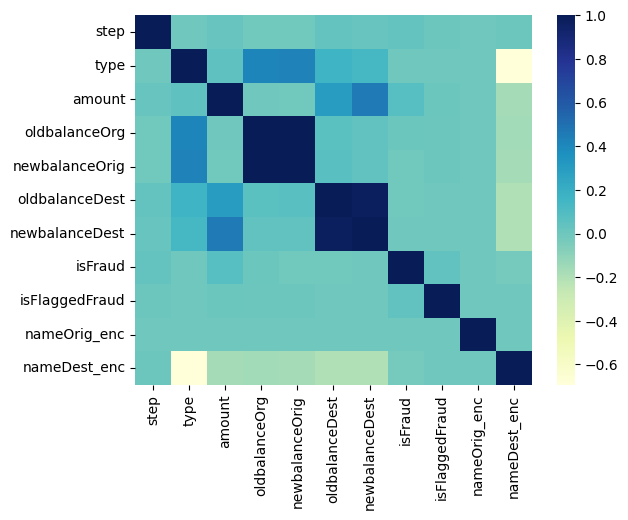

In [4]:
#heatmap
sns.heatmap(corr, cmap = 'YlGnBu')

In [5]:
#checking imbalance output feature
csv_file['isFraud'].value_counts().sort_index()

,count
isFraud,
0,6354407
1,8213


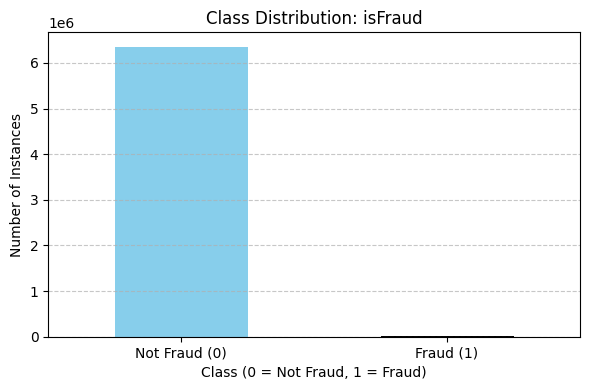

In [6]:
#output barchart
import matplotlib.pyplot as plt

bar_chart = csv_file['isFraud'].value_counts()

# Plot
plt.figure(figsize=(6,4))
bar_chart.plot(kind='bar', color=['skyblue', 'black'])
plt.title('Class Distribution: isFraud')
plt.xlabel('Class (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
#scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
rest_data = csv_file.drop(["isFraud"],axis =1)
target = csv_file["isFraud"]
x_train, x_test, y_train, y_test = train_test_split(rest_data, target, test_size=0.3,random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


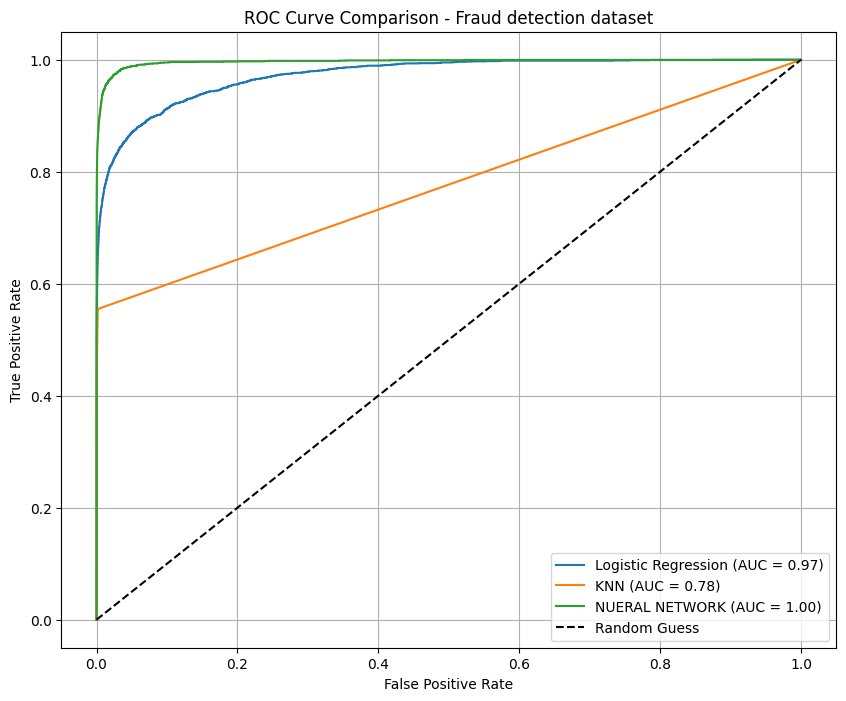

In [8]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "NUERAL NETWORK": MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
}


plt.figure(figsize=(10, 8))
dic={}

for name, model in models.items():
  model.fit(x_train_scaled, y_train)
  y_pred = model.predict(x_test_scaled)
  y_probs = model.predict_proba(x_test_scaled)[:, 1]

  fpr, tpr, _ = roc_curve(y_test, y_probs)
  roc_auc = auc(fpr, tpr)
  dic[name]=roc_auc

  plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Fraud detection dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()

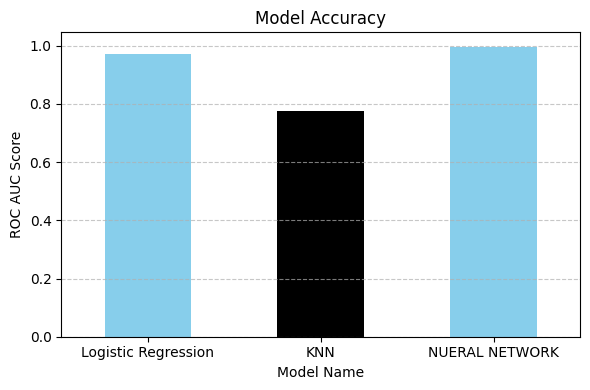

In [9]:
#Barchart of Roc Auc score
import matplotlib.pyplot as plt
import pandas as pd

roc_auc_scores = pd.Series(dic, name="ROC AUC")

plt.figure(figsize=(6, 4))
roc_auc_scores.plot(kind='bar', color=['skyblue', 'black'])
plt.title('Model Accuracy')
plt.xlabel('Model Name')
plt.ylabel('ROC AUC Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

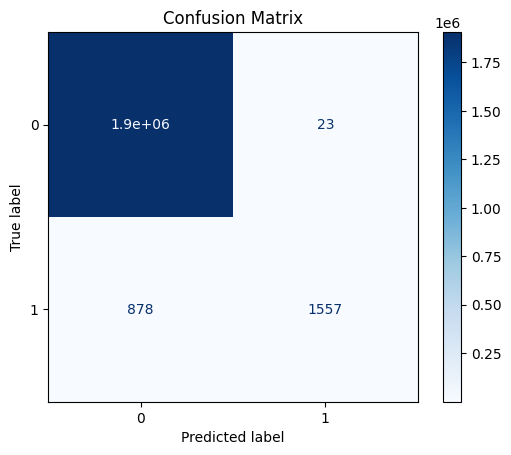

-----------------------------------------------------------------------
LogisticRegression: 0.9995279722294694
-----------------------------------------------------------------------
LogisticRegression:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00   1906351
           0       0.99      0.64      0.78      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.82      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786

-----------------------------------------------------------------------


In [10]:
# NEURAL NETWORKconfusion matrix,precission,recall,f1 score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train_scaled, y_train)
y_pred = mlp.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print("-----------------------------------------------------------------------")
print("LogisticRegression:", accuracy_score(y_test, y_pred))
print("-----------------------------------------------------------------------")
print("LogisticRegression:")
print(classification_report(y_test, y_pred, target_names=["1","0"]))
print("-----------------------------------------------------------------------")

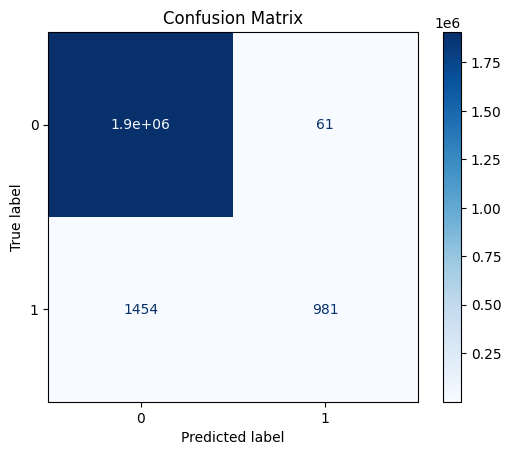

-----------------------------------------------------------------------
LogisticRegression: 0.9992063018064885
-----------------------------------------------------------------------
LogisticRegression:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00   1906351
           0       0.94      0.40      0.56      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.70      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786

-----------------------------------------------------------------------


In [11]:
#logstic regression confusion matrix,precission,recall,f1 score
lgr = LogisticRegression()
lgr.fit(x_train_scaled, y_train)
y_pred = lgr.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print("-----------------------------------------------------------------------")
print("LogisticRegression:", accuracy_score(y_test, y_pred))
print("-----------------------------------------------------------------------")
print("LogisticRegression:")
print(classification_report(y_test, y_pred, target_names=["1","0"]))
print("-----------------------------------------------------------------------")

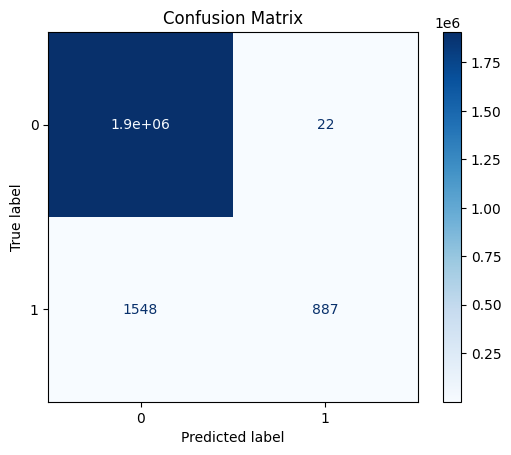

-----------------------------------------------------------------------
LogisticRegression: 0.9991774876806515
-----------------------------------------------------------------------
LogisticRegression:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00   1906351
           0       0.98      0.36      0.53      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.68      0.77   1908786
weighted avg       1.00      1.00      1.00   1908786

-----------------------------------------------------------------------


In [12]:
#KNN confusion matrix,precission,recall,f1 score
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print("-----------------------------------------------------------------------")
print("LogisticRegression:", accuracy_score(y_test, y_pred))
print("-----------------------------------------------------------------------")
print("LogisticRegression:")
print(classification_report(y_test, y_pred, target_names=["1","0"]))
print("-----------------------------------------------------------------------")